## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import scipy.stats as stats

## 2. Get the Data

In [5]:
mnist=pd.read_csv("Mnist_combined.csv",index_col=0)

In [6]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.shape

(70000, 785)

## 3. Convert the Data into Tensor Dataset

In [8]:
X = mnist.drop(labels = "label" ,axis = 1)
Y = mnist["label"]

In [9]:
Y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [10]:
data_np = X.to_numpy()
labels_np = Y.to_numpy()

In [11]:
data_np[0].shape

(784,)

In [12]:
labels_np.shape

(70000,)

In [13]:
labels_np

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [14]:
#labels_np=labels_np[:,None]

In [15]:
# normalize the data to a range of [0 1]
dataNorm = data_np / np.max(data_np)

In [16]:
dataNorm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Converting Numpy array to Pytorch Array

In [17]:
# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# Note: "long" format for CCE : Multiclass classification
labels = torch.tensor(labels_np).long() 

In [18]:
labels

tensor([5, 0, 4,  ..., 4, 5, 6])

#### Train and Test Loader

In [19]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [20]:
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

In [21]:
train_labels.shape

torch.Size([63000])

In [22]:
test_labels.shape

torch.Size([7000])

In [23]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

In [24]:
# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

In [25]:
train_data.tensors

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([3, 8, 1,  ..., 2, 5, 7]))

In [26]:
# Finally, translate into dataloader objects

batchsize    = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True  ,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0] )

## 4. Create and validate the model

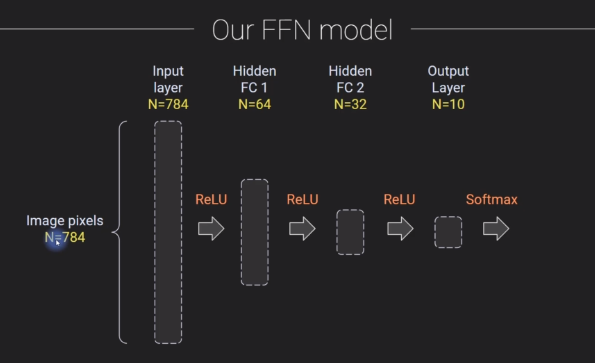

In [27]:
# create a class for the model
def createTheMNISTNet(LR):

    class MNISTNet(nn.Module):
        
        def __init__(self):
            super().__init__()

            ### Input layer
            self.input = nn.Linear(784,64)

            ### Hidden layer-1
            self.fc1 = nn.Linear(64,32)
            
            ### Hidden Layer-2
            self.fc2 = nn.Linear(32,32)

            ### Output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            
            # Input  Layer
            x = F.relu( self.input(x) ) 
            # Hidden Layer-1
            x = F.relu( self.fc1(x) )
            # Hidden Layer-2
            x = F.relu(self.fc2(x))
            
            return self.output(x)
        
    # create the model instance
    ANN_model = MNISTNet()

    # loss function : Negative Log-Likelihood Loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANN_model.parameters(),lr=LR)

    return ANN_model,lossfunc,optimizer

In [28]:
tmpnet = createTheMNISTNet(LR=0.001)[0]
print(tmpnet)

print("fc1 Shape : ",tmpnet.fc1.weight.shape)

print('\n\nWeights for layer fc1:')
print(tmpnet.fc1.weight.data)

MNISTNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)
fc1 Shape :  torch.Size([32, 64])


Weights for layer fc1:
tensor([[-0.0166, -0.0929,  0.0363,  ..., -0.0217,  0.0067, -0.1100],
        [-0.0591, -0.0952, -0.0293,  ...,  0.0527, -0.0613, -0.0862],
        [ 0.0071,  0.0968, -0.0436,  ...,  0.0143, -0.1070,  0.0911],
        ...,
        [ 0.0657,  0.0775, -0.0943,  ..., -0.1013, -0.0318,  0.0732],
        [-0.0088, -0.1184,  0.1051,  ..., -0.0811,  0.0770, -0.0774],
        [ 0.1134,  0.0617, -0.0632,  ...,  0.0789, -0.0809, -0.0414]])


## 5. Brief inspection of requires_grad

In [29]:
# inspect the "learning toggle" of a layer
N = createTheMNISTNet(LR=0.001)[0]
N.fc1.weight.requires_grad

True

In [30]:
# switch off all layers except input
for p in N.named_parameters():
    
    if 'input' not in p[0]:
        p[1].requires_grad = False
  

# check what we've done
for p in N.named_parameters():
    print(f'Requires_grad status in layer {p[0]}: {p[1].requires_grad}')

Requires_grad status in layer input.weight: True
Requires_grad status in layer input.bias: True
Requires_grad status in layer fc1.weight: False
Requires_grad status in layer fc1.bias: False
Requires_grad status in layer fc2.weight: False
Requires_grad status in layer fc2.bias: False
Requires_grad status in layer output.weight: False
Requires_grad status in layer output.bias: False


## 6. Model Training

In [31]:
def function2trainTheModel(Model, lossfunc, optimizer, train_loader, test_loader, epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):
        
        # Switch-off learning in all layers except the output layers during first 1/2 of training
        if epochi<(int(epochs/2)):
            
            for p in Model.named_parameters():
                if 'output' not in p[0]:
                    p[1].requires_grad = False
        else:
            for p in Model.named_parameters():
                p[1].requires_grad = True
        
        

        # Switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model

## 7. Experiment

In [32]:
# create the network
ANN_model, Lossfunc, Optimizer = createTheMNISTNet(LR=0.001)

# train the model
TrainAcc,TestAcc,Losses,trained_model = function2trainTheModel(Model= ANN_model ,
                                                               lossfunc= Lossfunc ,
                                                               optimizer=Optimizer  ,
                                                               train_loader=train_loader  ,
                                                               test_loader=test_loader  ,
                                                               epochs = 50)


## 8. Results Visualization

In [33]:
# plt.figure(figsize=(10,4), dpi=145)

# plt.plot(Losses, label='Losses')
# plt.plot(TrainAcc,label='Train')
# plt.plot(TestAcc,label='Test')

# plt.plot([len(TrainAcc)/2, len(TestAcc)/2],[10,80],'k--',label='Learning switched on')
# plt.legend()

# plt.show()

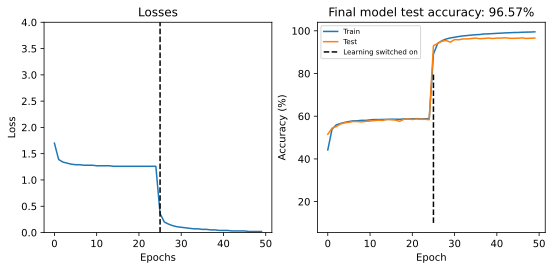

In [43]:
fig,ax = plt.subplots(1,2,figsize=(9,3.8), dpi=145)

ax[0].plot(Losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')
ax[0].plot([len(TrainAcc)/2, len(TestAcc)/2],[0,4],'k--',label='Learning switched on')
ax[0].set_ylim(0,4)

ax[1].plot(TrainAcc,label='Train')
ax[1].plot(TestAcc, label='Test')

ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc[-1]:.2f}%')

ax[1].plot([len(TrainAcc)/2, len(TestAcc)/2],[10,80],'k--',label='Learning switched on')

ax[1].legend(fontsize = 7)

plt.show()

In [44]:
import numpy

In [47]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [48]:
np.diff(np.arange(7))

array([1, 1, 1, 1, 1, 1])